In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
import requests
from IPython.core.display import HTML
def css_style(url):
    style = requests.get(url)
    return HTML(style.text)

In [2]:
css_style('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')

# Nonlinear Solvers -- Bisection Method
## Bisection method algorithm

Given $a$ and $b$, which bracket a root of $f(x)$:
1. Set $c=(a+b)/2$
2. Choose new values for $a$ and $b$. If $f(a)f(c) < 0$, set $b=c$, else set $a=c$
3. Check for convergence. If converged, return $(a+b)/2$, else return to step 1

In [64]:
def bisect(f, a, b, tol, maxiter):
    import numpy as np
    err = tol + 100
    niter = 0
    points = []
    while err > tol and niter < maxiter:
        niter += 1
        c = (a+b)/2
        if (f(a)*f(c) < 0.):
            b = c
        else:
            a = c
        err = abs(f(c))
        points.append(c)
    return c, err, niter, np.asarray(points)

In [65]:
def f(x):
    return x**2 - 2

In [66]:
x = np.linspace(-3, 3, 100)

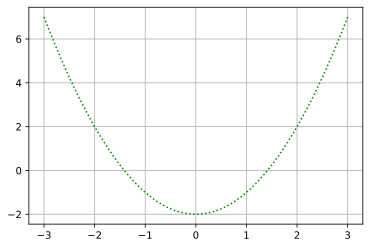

In [67]:
plt.plot(x, f(x), 'g:')
plt.grid(True)

In [68]:
c, err, iters, points = bisect(f, 1, 3, 1e-3, 25)

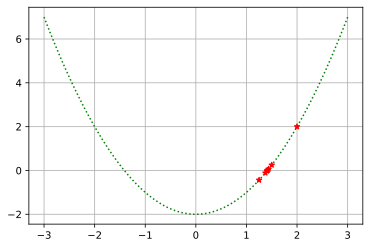

In [69]:
plt.plot(x, f(x), 'g:')
plt.plot(points, f(points), 'r*')
plt.grid(True)

### Solving the parachutist problem

In [70]:
def parachute_vel(c, u=40, m=70, t=10):
    ''' Returns the residual form of the equation'''
    import numpy as np
    g = 9.81   # m/s^2
    return m*g/c * (1-np.exp(-c*t/m)) - u

The parachutist velocity is written in terms of the residual form of the exact solution, so that the bisection algorithm can perform a search for c that satisfies the equation. The exact solution for a parachutist subject to drag and gravity is:

$$u(t)\  =\  \frac{mg}{c} (1-e^{-\frac{c}{m} t})$$

where the residual form of the equation is:

$$r(c)\  =\  \frac{mg}{c} (1-e^{-\frac{c}{m} t})\  -\  u(t)$$

Here, I am declaring the resudual form to be a function of the drag coefficient $c$, since that is the target value that we will be using in order to achieve the other conditions of the problem, where a 70kg parachutist much achieve a velocity of 40 m/s after 10 seconds of falling.

In [71]:
c, err, niter, points = bisect(parachute_vel, 0.1, 100, 1e-6, 100)

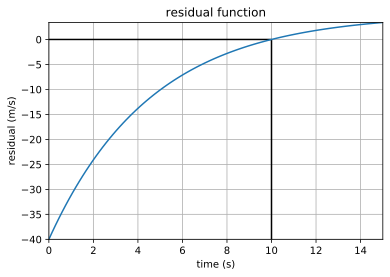

In [72]:
t = np.linspace(0, 15, 100)
plt.plot(t, parachute_vel(t=t, c=c))
plt.hlines(0, t[0], 10)
plt.vlines(10, parachute_vel(t=t[0], c=15.2139), parachute_vel(t=10, c=15.2139))
plt.xlabel('time (s)')
plt.ylabel('residual (m/s)')
plt.title('residual function')
plt.xlim(t[0], t[-1])
plt.ylim(parachute_vel(t=t[0], c=15.2139), parachute_vel(t=t[-1], c=15.2139))
plt.grid(True)

Plotting the residual as a function of the drag coefficient:

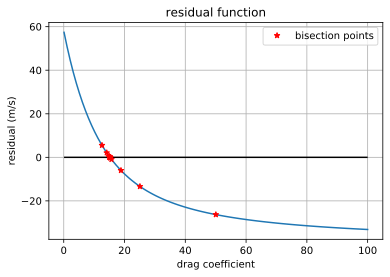

In [73]:
c_ = np.linspace(0.1, 100, 100)
plt.plot(c_, parachute_vel(c_))
plt.plot(points, parachute_vel(c=points), 'r*', label='bisection points')
plt.xlabel('drag coefficient')
plt.ylabel('residual (m/s)')
plt.hlines(0, c_[0], c_[-1])
plt.title('residual function')
plt.grid(True)
plt.legend()

In [74]:
c

15.214089776575568

In [75]:
points

array([50.05      , 25.075     , 12.5875    , 18.83125   , 15.709375  ,
       14.1484375 , 14.92890625, 15.31914063, 15.12402344, 15.22158203,
       15.17280273, 15.19719238, 15.20938721, 15.21548462, 15.21243591,
       15.21396027, 15.21472244, 15.21434135, 15.21415081, 15.21405554,
       15.21410317, 15.21407936, 15.21409127, 15.21408531, 15.21408829,
       15.21408978])

In [76]:
niter

26

Let's now try 10 m/s

In [78]:
def r(c, u=10, m=70, t=10):
    ''' Returns the residual form of the equation'''
    import numpy as np
    g = 9.81   # m/s^2
    return m*g/c * (1-np.exp(-c*t/m)) - u

In [82]:
bisect(r, 65, 70, 1e-6, 100)

(68.66622924804688,
 1.8231350118469436e-07,
 15,
 array([67.5       , 68.75      , 68.125     , 68.4375    , 68.59375   ,
        68.671875  , 68.6328125 , 68.65234375, 68.66210938, 68.66699219,
        68.66455078, 68.66577148, 68.66638184, 68.66607666, 68.66622925]))

## Using SciPy's fsolve

In [86]:
from scipy.optimize import fsolve

In [87]:
fsolve(r, 10)

array([68.666228])